<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Filtering" data-toc-modified-id="Filtering-1">Filtering</a></span><ul class="toc-item"><li><span><a href="#Filter-out-dangling-ends-and-self-circles" data-toc-modified-id="Filter-out-dangling-ends-and-self-circles-1.1">Filter out dangling ends and self-circles</a></span></li><li><span><a href="#Apply-filters-on-the-data" data-toc-modified-id="Apply-filters-on-the-data-1.2">Apply filters on the data</a></span><ul class="toc-item"><li><span><a href="#Evaluate-changes" data-toc-modified-id="Evaluate-changes-1.2.1">Evaluate changes</a></span></li></ul></li><li><span><a href="#Save-to-BAM" data-toc-modified-id="Save-to-BAM-1.3">Save to BAM</a></span></li></ul></li></ul></div>

# Filtering

![Filetrs](images/Filters.jpeg)

In [1]:
cell = 'mouse_B'  # or mouse_PSC
rep = 'rep1'  # or rep2

## Filter out dangling ends and self-circles

In [2]:
from pytadbit.mapping.filter import filter_reads

The `max_molecule_length` parameter used to filter-out pseudo-dangling-ends can be extracted from the previous section in the computation of insert size.

The `min_distance_to_re`, that affects the detection of random breaks, should be a bit larger in order to contain almost all the fragments.

In [3]:
# this will last ~10 minutes
masked = filter_reads(
    'results/fragment/{0}_{1}/03_filtering/reads12_{0}_{1}.tsv'.format(cell, rep), 
    max_molecule_length=750, over_represented=0.005, max_frag_size=100000, 
    min_frag_size=50, re_proximity=5, min_dist_to_re=1000)

Filtered reads (and percentage of total):

                   Mapped both  :   87,862,102 (100.00%)
  -----------------------------------------------------
   1-               self-circle :       87,761 (  0.10%)
   2-              dangling-end :    4,813,620 (  5.48%)
   3-                     error :       18,165 (  0.02%)
   4-        extra dangling-end :   12,933,038 ( 14.72%)
   5-        too close from RES :   21,372,275 ( 24.32%)
   6-                 too short :    3,628,579 (  4.13%)
   7-                 too large :        1,256 (  0.00%)
   8-          over-represented :    2,693,107 (  3.07%)
   9-                duplicated :    1,605,185 (  1.83%)
  10-             random breaks :      308,512 (  0.35%)


This generates a dictionary with the different filters and the reads affected by each.

## Apply filters on the data

In [4]:
from pytadbit.mapping.filter import apply_filter

apply_filter('results/fragment/{0}_{1}/03_filtering/reads12_{0}_{1}.tsv'.format(cell, rep), 
             'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep), masked, 
             filters=[1, 2, 3, 4, 6, 7, 9, 10])

    saving to file 66,612,427 reads without.


66612427

### Evaluate changes

/home/fransua/.miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/home/fransua/.miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


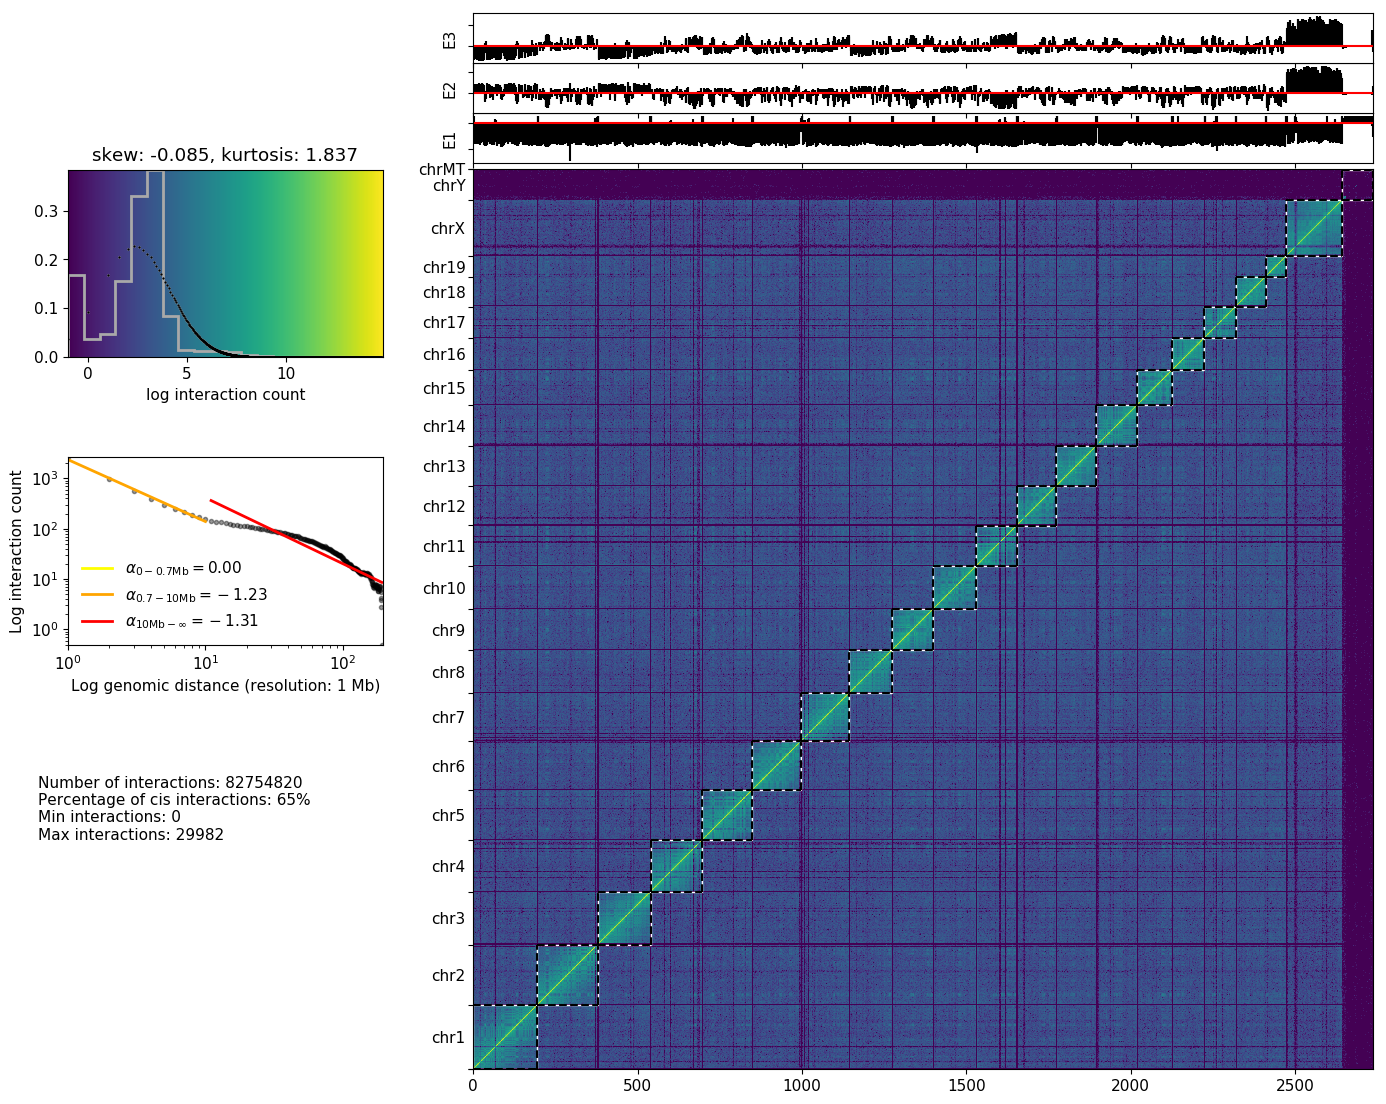

In [5]:
from pytadbit.mapping.analyze import hic_map

hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep), 
        resolution=1000000, show=True, cmap='viridis')

Zoom to a single chromosome or a region:

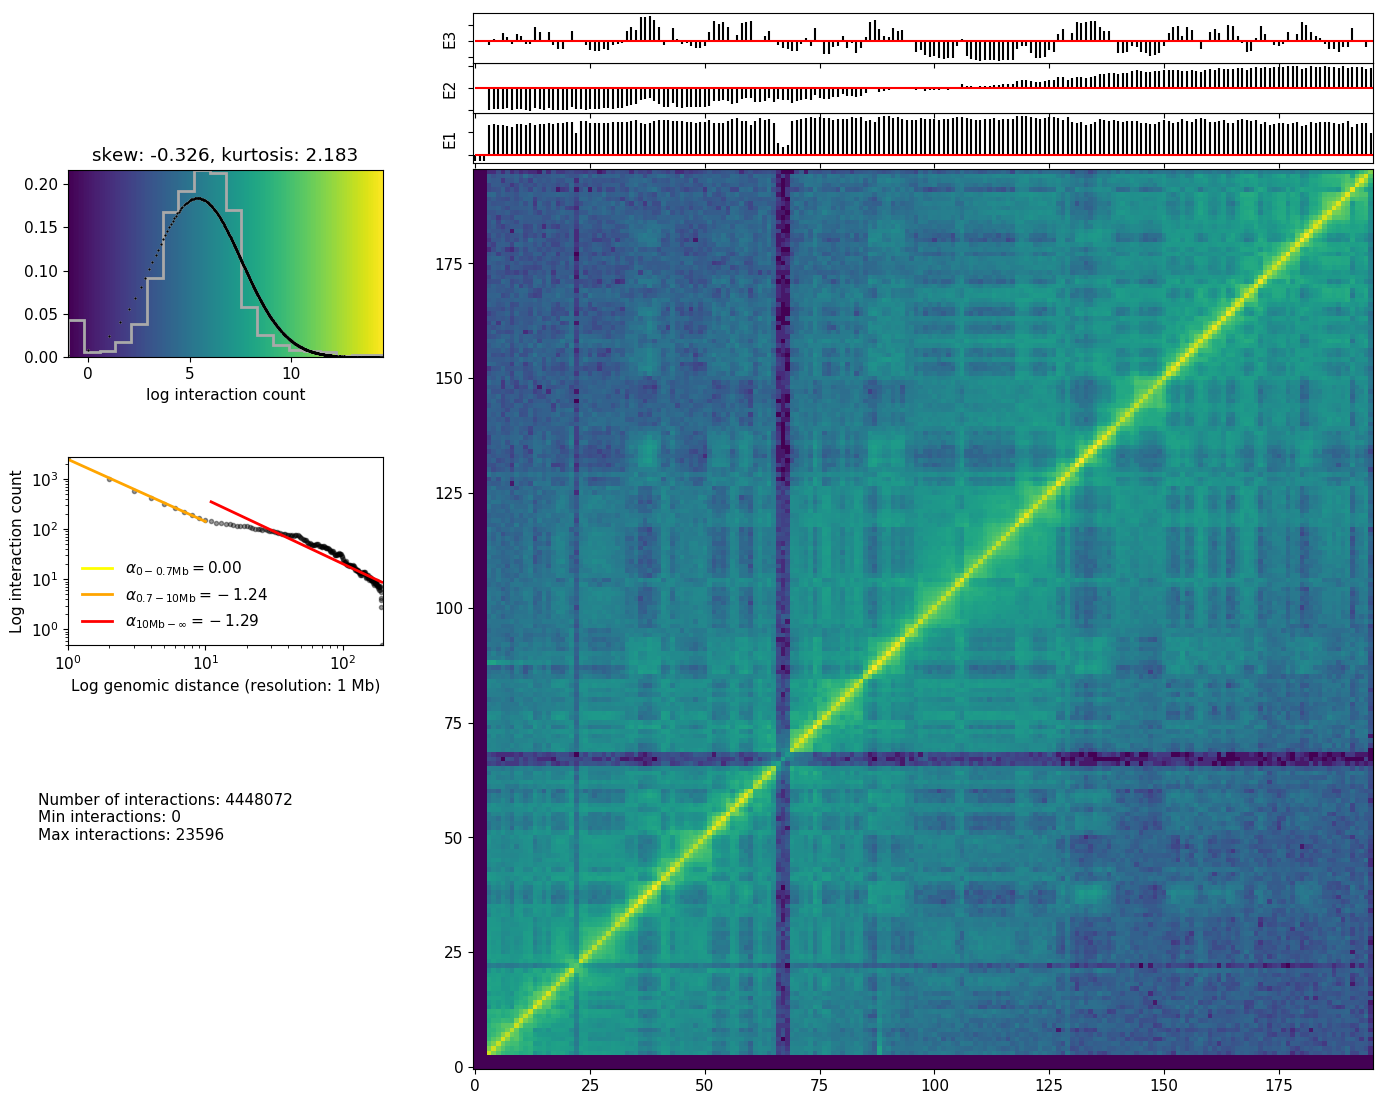

In [6]:
hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep), 
        resolution=1000000, show=True, focus='chr1', cmap='viridis')

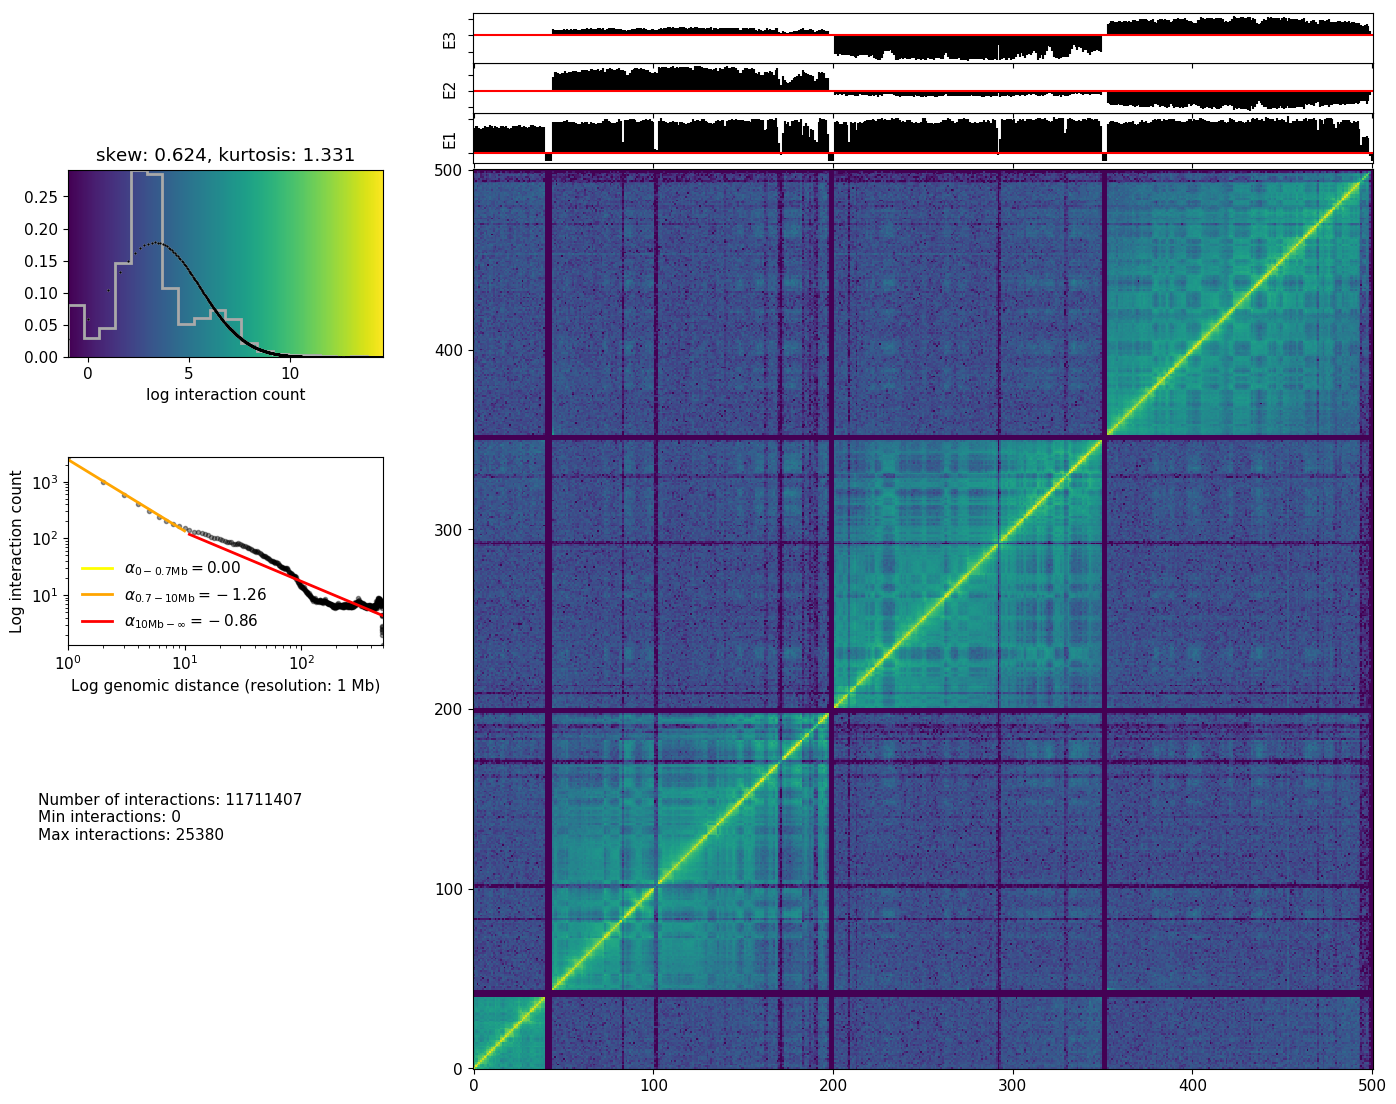

In [7]:
hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep), 
        resolution=1000000, show=True, focus=(500, 1000), cmap='viridis')

## Save to BAM

In [8]:
from pytadbit.parsers.hic_bam_parser import bed2D_to_BAMhic

In [9]:
bed2D_to_BAMhic('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep), 
                valid=True, ncpus=8, 
                outbam='results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}'.format(cell, rep), 
                frmt='mid', masked=None)